## **Install Scraprr**

In [ ]:
!pip install scraprr

### **Now, let's import.**

In [69]:
from scraprr import fetch_url, extract_tag, extract_attribute
import time
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## **We can now test out some functions**

In [ ]:
# Fetches the html off of wikipedia

response = fetch_url("https://www.wikipedia.org/")

response

In [38]:
# Extracts content within the <title> tags
title = extract_tag(response, "title")
att = extract_attribute(response, "link", "href")
att

['/static/apple-touch/wikipedia.png',
 '/static/favicon/wikipedia.ico',
 '//creativecommons.org/licenses/by-sa/4.0/',
 '//upload.wikimedia.org',
 'https://wikis.world/@wikipedia']

## **Speed Timing**

In [56]:

times = []

for _ in range(200):
    start = time.perf_counter()

    response = fetch_url("https://www.wikipedia.org/")

    end = time.perf_counter()
    # print(f"Time taken: {end - start:.4f} seconds")
    times.append(end - start)

print("finished")
print(time.time())



finished
1753388385.4855335


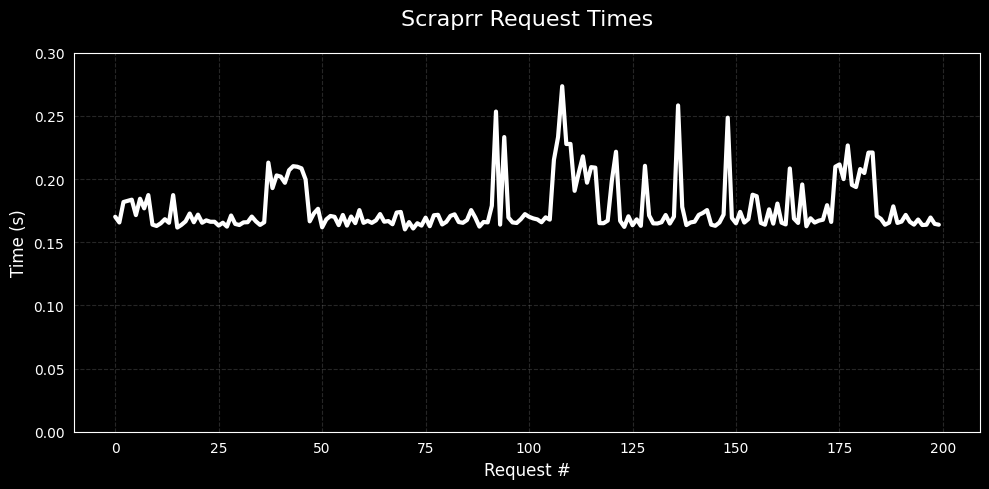

In [86]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(times, color='white', marker='', markersize=0, linewidth=3)

ax.set_title("Scraprr Request Times", fontsize=16, color='white', pad=20)
ax.set_xlabel("Request #", fontsize=12, color='white')
ax.set_ylabel("Time (s)", fontsize=12, color='white')
ax.set_ylim(0, 0.3)

ax.grid(True, color='gray', linestyle='--', alpha=0.3)

# Customize ticks
ax.tick_params(colors='white')

plt.tight_layout()
plt.show()


In [57]:
times1 = []

for _ in range(200):
    start = time.perf_counter()

    response = requests.get("https://www.wikipedia.org/")

    end = time.perf_counter()
    # print(f"Time taken: {end - start:.4f} seconds")
    times1.append(end - start)

print("finished")
print(time.time())


finished
1753388398.6709158


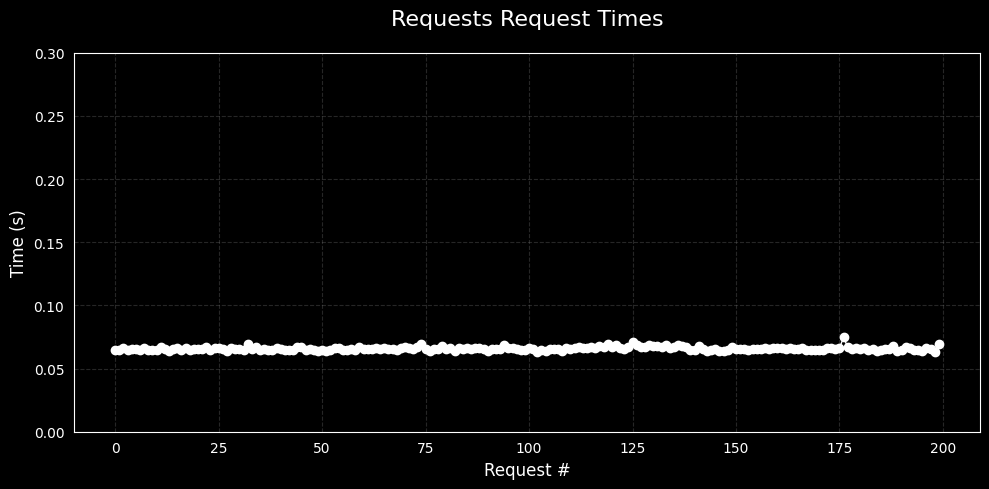

In [117]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(times1, color='white', marker='o', linewidth=1)

ax.set_title("Requests Request Times", fontsize=16, color='white', pad=20)
ax.set_xlabel("Request #", fontsize=12, color='white')
ax.set_ylabel("Time (s)", fontsize=12, color='white')
ax.set_ylim(0, 0.3)

ax.grid(True, color='gray', linestyle='--', alpha=0.3)

ax.tick_params(colors='white')

plt.tight_layout()
plt.show()


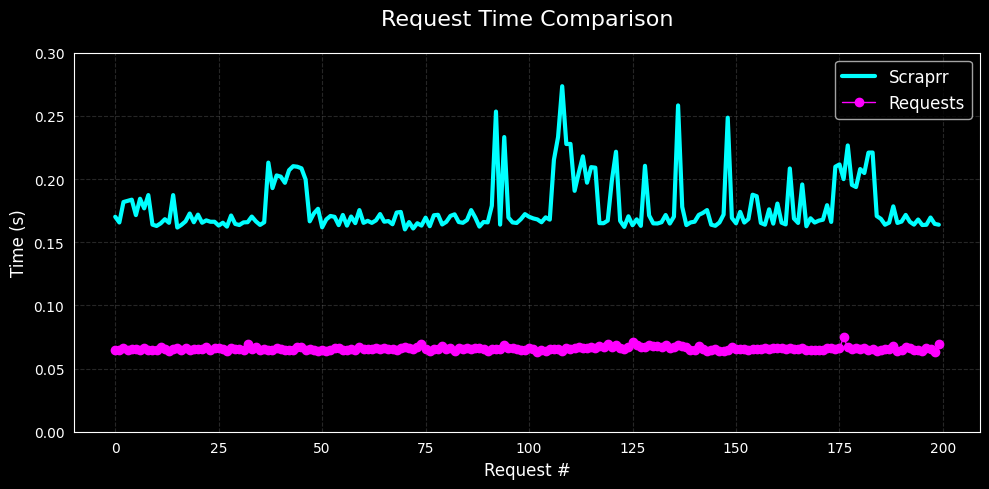

In [118]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(times, label="Scraprr", color='cyan', marker='', linewidth=3, antialiased=True)

ax.plot(times1, label="Requests", color='magenta', marker='o', linewidth=1, antialiased=True)

ax.set_title("Request Time Comparison", fontsize=16, color='white', pad=20)
ax.set_xlabel("Request #", fontsize=12, color='white')
ax.set_ylabel("Time (s)", fontsize=12, color='white')
ax.set_ylim(0, 0.3)

ax.grid(True, color='gray', linestyle='--', alpha=0.3)
ax.tick_params(colors='white')

ax.legend(loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig("comparison.png", dpi=300, bbox_inches='tight')

plt.show()



## **Calculate the Averages**

In [116]:
sum = 0
sum1 = 0
sum2 = 0
for i in range(200):
    sum += times[i] - times1[i]
    sum1 += times1[i]
    sum2 += times[i]

sum /= len(times)
sum1 /= len(times)
sum2 /= len(times)

# print(sum)

print(f"Average request time for Requests: {sum1}")

print(f"Average request time for Scraprr: {sum2}")

print(f"On average, Scraprr takes {sum2/sum1 * 100:.3f}% more time to make HTTP requests")

import statistics

std_times = statistics.stdev(times)
std_times1 = statistics.stdev(times1)

print(f"Standard deviation of times: {std_times:.5f} seconds")
print(f"Standard deviation of times1: {std_times1:.5f} seconds")


Average request time for Requests: 0.06584888855499912
Average request time for Scraprr: 0.1776198159249884
On average, Scraprr takes 269.739% more time to make HTTP requests
Standard deviation of times: 0.02076 seconds
Standard deviation of times1: 0.00141 seconds
